# 

In [32]:
# Importation des modules
from gapminder import gapminder as gm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
# 2 head(), describe(), info()
# Retourne les x premières lignes
gm.head(5)

# Donne plusieurs informations des valeurs numériques (nombre, moyenne, écart type, ...)
gm.describe()

#Affiche le type, l'utilisation de la mémoire, types des colonnes
gm.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'lifeExp'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'gdpPercap'}>]], dtype=object)

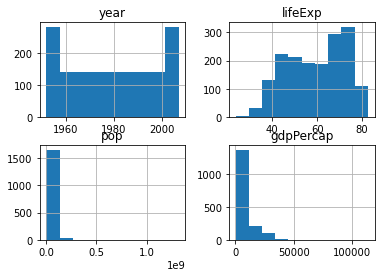

In [34]:
# 3

gm.hist()

# Q1 Que pouvez-vous conclure à partir de ces histogrammes ?

LifeEXP : On remarque que la plupart des mesures indiques un life exp centré sur la droite (asymétrique positive) : c'est à dire qu'une majorité de mesures donnaient de bonnes espérances de vies

Pop :  On remarque qu'il y a quelques mesures "extrêmes", c'est à dire qui semblent assez abherrantes comparées à la plupart des autres mesures. Ici l'histogramme n'est pas adapté car ce n'est pas visible.

Year: On remarque que y'a beaucoup de mesures avant 1960, très stable entre ~1960 et 2000, et de nouveau beaucoup de mesures > 2000

gdpPerCap : On remarque que la plupart des données se situent sur la gauche (peut-être que la plupart sont des pays pauvres) avec des mesures "abherrantes"  avec un PIB/hab qui explose le reste.

In [35]:
# 4 Afficher le nombre de mesures par pays
countPerCountries = gm.groupby(by=["country"]).size()
print(countPerCountries)

print("Pays avec des données manquantes :")
# Vérifier si'il y a des données qui manquent
print(countPerCountries.where(lambda x: x != 12).dropna())

country
Afghanistan           12
Albania               12
Algeria               12
Angola                12
Argentina             12
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen, Rep.           12
Zambia                12
Zimbabwe              12
Length: 142, dtype: int64
Pays avec des données manquantes :
Series([], dtype: float64)


In [36]:
# 5 Lister les valeurs uniques
print(gm["country"].unique())
print(gm["continent"].unique())
print(gm["year"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar

<AxesSubplot:title={'center':'Moyenne des espérances de vie de tous les plays'}, xlabel='Année', ylabel='Espérance de vie'>

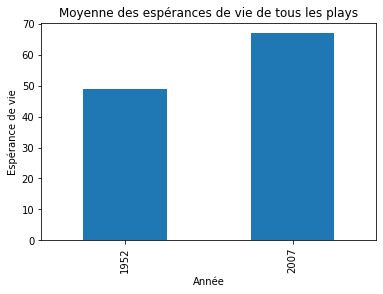

In [37]:
# 6
year = [1952, 2007]
gm.groupby(['year']).describe()['lifeExp']["mean"].loc[year].plot.bar(xlabel = "Année", ylabel = "Espérance de vie", title = "Moyenne des espérances de vie de tous les plays")

Text(0.5, 0, 'Année')

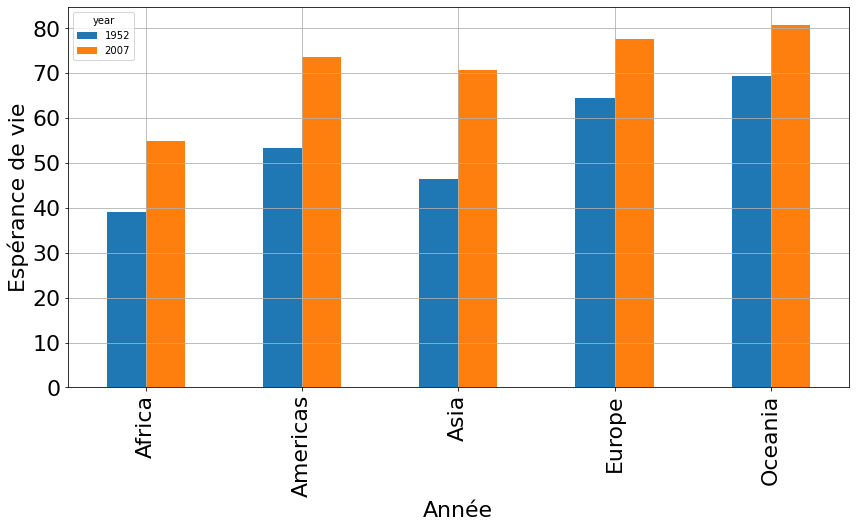

In [38]:
condition = gm["year"].isin(year)
filteredData = gm[condition]
description = filteredData.groupby(["continent", 'year']).describe()
lifeExpMeansPerContinent =  description["lifeExp"]["mean"]
unstacked = lifeExpMeansPerContinent.unstack(level=1)

fontsize = 22

bar = unstacked.plot.bar(grid = True, fontsize=fontsize, figsize=(14, 7))
bar.set_ylabel("Espérance de vie", fontsize=fontsize)
bar.set_xlabel("Année", fontsize=fontsize)


# Q2

On peut remarquer, en observant le graphique, que le continent ayant eu le plus d'augmentation est l'Asie avec +24 années en plus.

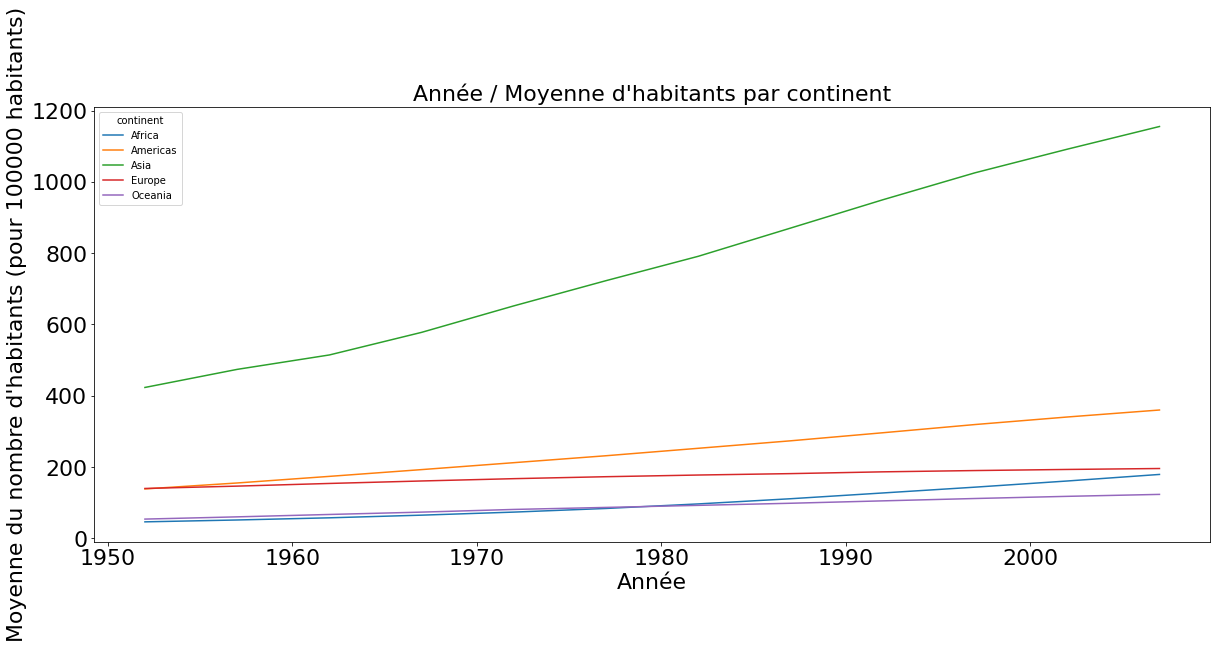

In [39]:
# 8
def set_labels(plot, x, y, title):
    plot.set_xlabel(x, fontsize=fontsize)
    plot.set_ylabel(y, fontsize=fontsize)
    plot.set_title(title, fontsize=fontsize)

factor = 100_000
ylabel =  "Moyenne du nombre d'habitants (pour " + str(factor) + " habitants)"
popMeansPerContinentYear = gm.groupby(["continent", "year"])["pop"].mean().apply(lambda x: int(x)) / factor
axes = popMeansPerContinentYear.unstack(level=0).plot(figsize=(20, 8), fontsize=fontsize)
axes.ticklabel_format(style="plain", useOffset=True)
set_labels(axes, "Année", ylabel, "Année / Moyenne d'habitants par continent")

# Q3

Nous remarquons de là que la moyenne d'habitant par continent a énormément progresser en asie. Celui-ci est rester relativement stable dans les autres pays, sauf dans les amériques où il a légèrement augmenté. C'est très certainement dû à la Chine qui a tiré la moyenne vers le haut.

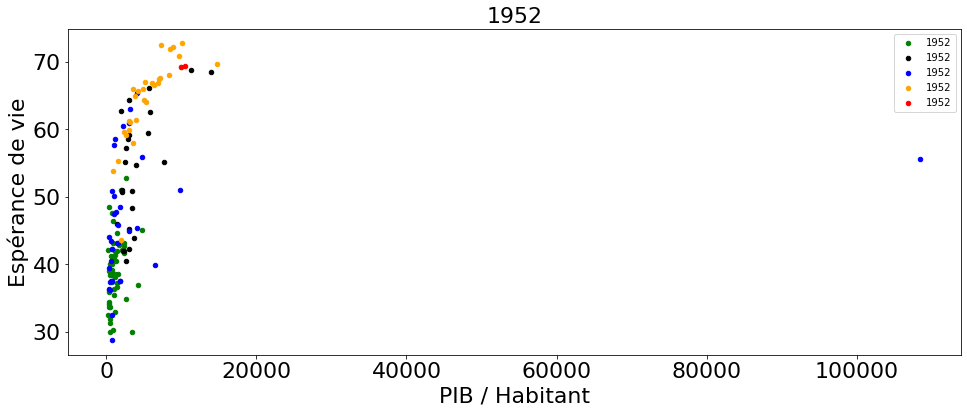

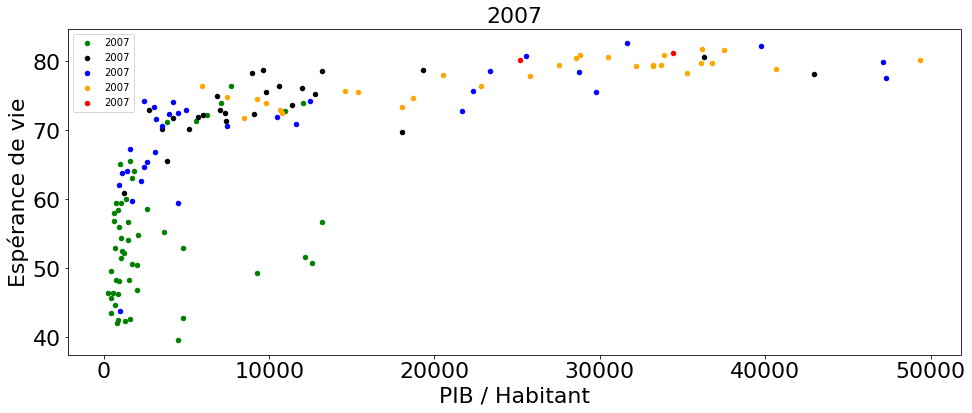

In [40]:
countries = gm[gm["year"].isin(year)][["country", "continent", "pop", "gdpPercap", "year", "lifeExp"]]
map = {"Asia": "blue", "Europe" : "orange", "Africa" : "green", "Oceania": "red", "Americas":"black"}

years = countries.groupby("year")
def plot_year(title, yearGroup):
    continents = yearGroup.groupby("continent")
    fig, ax = plt.subplots(figsize=(16, 6))
    for continentName, group in continents:
        scatter  = group.plot.scatter(ax=ax, fontsize=fontsize,  x="gdpPercap", y="lifeExp", label=key, color=map[continentName])
        set_labels(scatter, "PIB / Habitant", "Espérance de vie", title)
for key, group in years:
    plot_year(key, group)


# Q4

Nous remarquons ici que les pays africains sont parmis les pays avec la plus faibles espérance de vie et pib / habitant. Aussi, nous avons une valeur aberrantes en 1952, qui étire l'axe X du graphe sur la droite, donnant l'impression que que la plupart des pays sont pauvres. Nous remarquons aussi que, comme observés avec les graphiques précédents, les pays asiatiques ont vu leur PIB / habitant et l'eur espérance de vie exploser. Il semblerait aussi qu'il y a une certaines corrélation entre PIB / habitant et l'espérance de vie. Aussi, globalement, l'espérance de vie a augmenté entre 1952 et 2007. Aussi, nous remarquons que beaucoup de pays asiatiques figurent parmis les pays avec le plus haut PIB / Habitants. Il pourrait s'agir de pays moyen-orientaux, faiblement peuplés mais très riches en terme de PIB. Il pourrait être intéressant de diviser les continents par un continent supplémentaire, le moyen-orient.

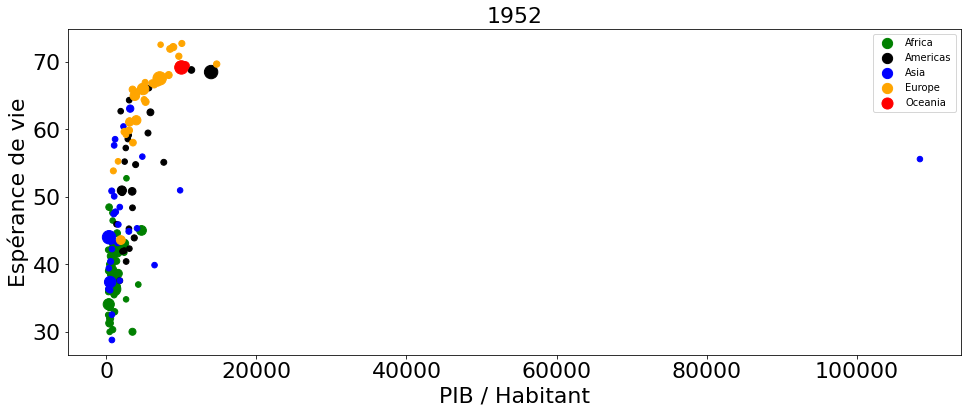

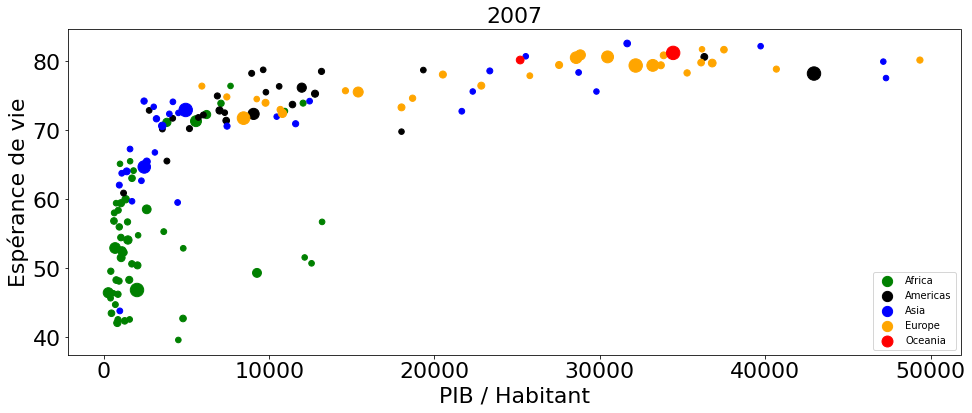

In [41]:
# 10

def scale(serie):
    max = serie.max()
    return serie / max

def plot_year_with_marker_sizes(title, yearGroup):
    continents = yearGroup.groupby("continent")
    fig, ax = plt.subplots(figsize=(16, 6))
    for key, group in continents:
        scatter  = group.plot.scatter(ax=ax, fontsize=fontsize, ylabel="Espérance de vie", s=30 + scale(group["pop"]) * 150,  x="gdpPercap", y="lifeExp", label=key, color=map[key])
        set_labels(scatter, "PIB / Habitant", "Espérance de vie", title)


for key, group in years:
    plot_year_with_marker_sizes(key, group)



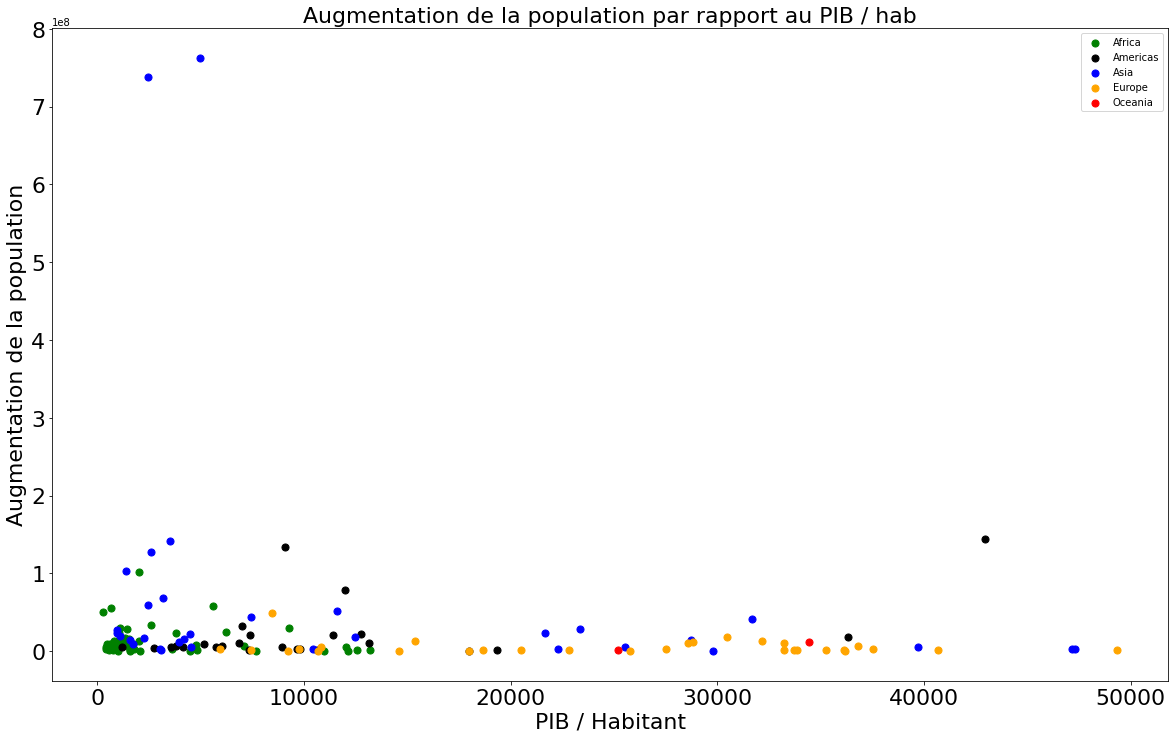

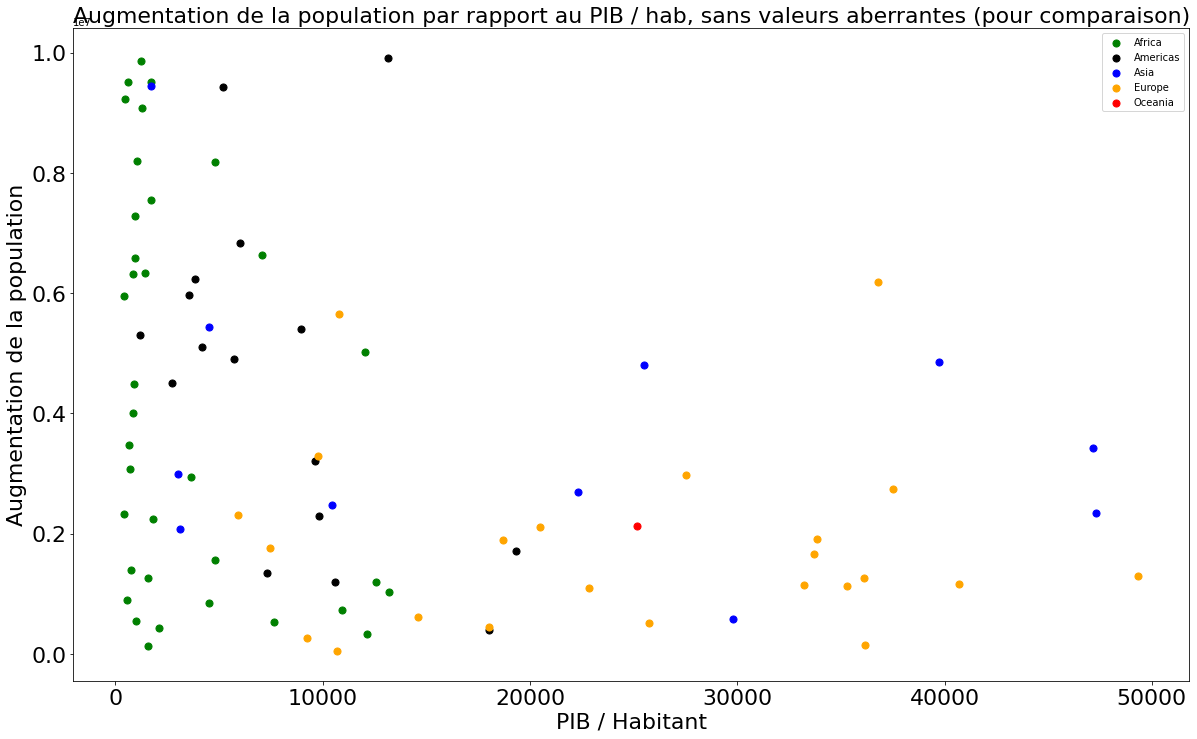

In [46]:
# 11
def display_scatter_pop_gdp(data, title) :
    f, ax = plt.subplots()
    for continentName, continentData in data.groupby("continent") :
        scatter = continentData.plot.scatter(ax=ax, x="gdpPercap", y="pop", s=50, label=continentName, color=map[continentName], fontsize=fontsize, figsize=(20,12))
        set_labels(scatter, "PIB / Habitant", "Augmentation de la population", title)

lastYearData = gm.loc[gm.year == 2007, ['country', 'continent', 'gdpPercap', 'pop']]
firstYearData = gm.loc[gm.year == 1952, ['country', 'continent', 'gdpPercap', 'pop']]

lastYearData["pop"] = lastYearData["pop"].values - firstYearData["pop"].values


display_scatter_pop_gdp(lastYearData, "Augmentation de la population par rapport au PIB / hab")

lastYearData["pop"] = lastYearData["pop"][lastYearData["pop"].values < 10 ** 7]
display_scatter_pop_gdp(lastYearData, "Augmentation de la population par rapport au PIB / hab, sans valeurs aberrantes (pour comparaison)")

# Q5
Nous observons là que les populations européennes ont bien moins augmenté que les pas africains et asiatiques. Ce sont aussi  des pays pauvres avec un faible PIB / habitant qui ont eu l'augmentation la plus forte. Les pays les plus riches sont généralement les pays européens.